In [1]:
#from jupyterthemes import jtplot
#jtplot.style(theme='solarizedd', context='notebook', ticks=True, grid=False)

In [1]:
from cleanlab.filter_copy import find_label_issues_bench, find_label_issues_cow, find_label_issues_naive, find_label_issues_numba, find_label_issues_cow_spawn, find_label_issues_thread

In [55]:
from cleanlab.filter import find_label_issues
from cleanlab.filter_test import find_label_issues_test

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [3]:
def normalize(arr): 
    normalized = np.zeros(arr.shape, dtype=np.float16) 
    for i, a in enumerate(arr): 
        normalized[i] = a / np.sum(a) 
    return normalized 

In [4]:
colormap = plt.cm.rainbow

In [5]:
n_m = [(5000, 20000), (5000, 40000), (5000, 60000), (10000, 60000), (15000, 60000)]
#n_m = [(50, 1000)]

In [6]:
nt = 9
ncores = 10

In [10]:
#runtimes = np.zeros((len(n_m), ncores, nt))
#runtimes_cow = np.zeros((len(n_m), ncores, nt))
#runtimes_naive = np.zeros((len(n_m), ncores, nt))
#runtimes_numba = np.zeros((len(n_m), ncores, nt))
#runtimes_spawn = np.zeros((len(n_m), ncores, nt))
#runtimes_thread = np.zeros((len(n_m), ncores, nt))
runtimes_cow_spawn = np.zeros((len(n_m), ncores, nt))

In [7]:
np.random.seed(0) 

In [12]:
import multiprocessing
# for testing spawn on linux
multiprocessing.set_start_method('fork')

# careful benchmarking

In [17]:
# we need to do a dummy computation to compile numba code
n = 100
m = 5
pred_probs = np.random.randint(low=1, high=100, size=[n, m], dtype=np.uint8) 
pred_probs = normalize(pred_probs) 
labels = np.repeat(np.arange(m), n // m) 
_, _ = find_label_issues_numba(pred_probs=pred_probs, labels=labels, n_jobs=1)

In [13]:
for i, nm in enumerate(n_m): # varying number of classes 
    print(f"starting pair {nm}")
    n = nm[1]
    m = nm[0]
    pred_probs = np.random.randint(low=1, high=100, size=[n, m], dtype=np.uint8) 
    pred_probs = normalize(pred_probs) 
    labels = np.repeat(np.arange(m), n // m) 
    for n_jobs in range(ncores): 
        print(f"n_jobs {n_jobs+1}")
        # original implementation
        #issues, times = find_label_issues_bench(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        #runtimes[i, n_jobs, :] = times
        
        # spawn
        issues_cow_spawn, times_cow_spawn = find_label_issues_cow_spawn(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        runtimes_cow_spawn[i, n_jobs, :] = times_cow_spawn
        
        # thread
        #issues_thread, times_thread = find_label_issues_thread(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        #runtimes_thread[i, n_jobs, :] = times_thread
        
        # naive implementation with fork
        #issues_naive, times_naive = find_label_issues_naive(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        #runtimes_naive[i, n_jobs, :] = times_naive
        
        # numba
        #issues_numba, times_numba = find_label_issues_numba(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        #runtimes_numba[i, n_jobs, :] = times_numba
        
        # check everyone got the same answer
        #diff1 = np.sum(issues ^ issues_cow)
        #if diff1 != 0:
        #    print(f"original and cow don't match on {diff1}")
        #diff2 = np.sum(issues_cow ^ issues_naive)
        #if diff2 != 0:
        #    print(f"cow and naive don't match on {diff2}")
        #diff3 = np.sum(issues_naive ^ issues_numba)
        #if diff3 != 0:
        #    print(f"numba and naive don't match on {diff3}")
        #diff4 = np.sum(issues ^ issues_numba)
        #if diff4 != 0:
        #    print(f"original and numba don't match on {diff4}")
    print(f"finished pair {nm}") 

#np.save("vary_nm_original.npy", runtimes)
np.save("vary_nm_cow_spawn.npy", runtimes_cow_spawn)
#np.save("vary_nm_thread.npy", runtimes_thread)
#np.save("vary_nm_naive.npy", runtimes_naive)
#np.save("vary_nm_numba.npy", runtimes_numba)

starting pair (5000, 20000)
n_jobs 1
n_jobs 2
n_jobs 3
n_jobs 4
n_jobs 5
n_jobs 6
n_jobs 7
n_jobs 8
n_jobs 9
n_jobs 10
finished pair (5000, 20000)
starting pair (5000, 40000)
n_jobs 1
n_jobs 2
n_jobs 3
n_jobs 4
n_jobs 5
n_jobs 6
n_jobs 7
n_jobs 8
n_jobs 9
n_jobs 10
finished pair (5000, 40000)
starting pair (5000, 60000)
n_jobs 1
n_jobs 2
n_jobs 3
n_jobs 4
n_jobs 5
n_jobs 6
n_jobs 7
n_jobs 8
n_jobs 9
n_jobs 10
finished pair (5000, 60000)
starting pair (10000, 60000)
n_jobs 1
n_jobs 2
n_jobs 3
n_jobs 4
n_jobs 5
n_jobs 6
n_jobs 7
n_jobs 8
n_jobs 9
n_jobs 10
finished pair (10000, 60000)
starting pair (15000, 60000)
n_jobs 1
n_jobs 2
n_jobs 3
n_jobs 4
n_jobs 5
n_jobs 6
n_jobs 7
n_jobs 8
n_jobs 9
n_jobs 10
finished pair (15000, 60000)


In [14]:
runtimes_numba = np.load("vary_nm_numba.npy")

In [18]:
runtime_totals = np.cumsum(runtimes_spawn, axis=-1)

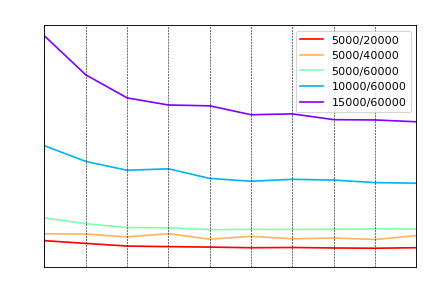

In [19]:
colormap = plt.cm.rainbow 
n_m = [(5000, 20000), (5000, 40000), (5000, 60000), (10000, 60000), (15000, 60000)] 
colors = [colormap(i) for i in np.linspace(1, 0, len(n_m))] 

plt.figure(figsize=(6, 4), dpi=80) 
for i, runtime in enumerate(runtime_totals[..., -1]): 
    plt.plot(np.arange(10)+1, runtime, label='%d/%d' % n_m[i], color=colors[i]) 
for x in range(10): 
    plt.axvline(x=x+1, color='k', linestyle='--', linewidth=0.5) 
plt.legend() 
plt.xticks(np.arange(10)+1) 
plt.xlim([1, 10]) 
plt.xlabel('n_jobs', c='w') 
plt.ylabel('Time (sec)', c='w') 
plt.ylim(bottom=0) 
plt.title('total times with varying m/n', c='w') 
plt.tick_params(colors='w')
plt.show() 

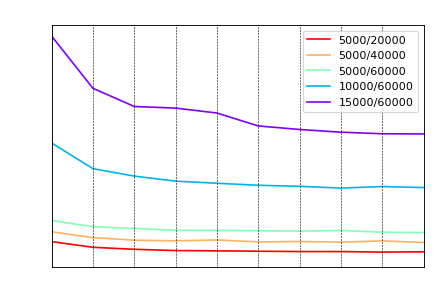

In [13]:
colormap = plt.cm.rainbow 
n_m = [(5000, 20000), (5000, 40000), (5000, 60000), (10000, 60000), (15000, 60000)] 
colors = [colormap(i) for i in np.linspace(1, 0, len(n_m))] 

plt.figure(figsize=(6, 4), dpi=80) 
for i, runtime in enumerate(runtime_totals[..., -1]): 
    plt.plot(np.arange(10)+1, runtime, label='%d/%d' % n_m[i], color=colors[i]) 
for x in range(10): 
    plt.axvline(x=x+1, color='k', linestyle='--', linewidth=0.5) 
plt.legend() 
plt.xticks(np.arange(10)+1) 
plt.xlim([1, 10]) 
plt.xlabel('n_jobs', c='w') 
plt.ylabel('Time (sec)', c='w') 
plt.ylim(bottom=0) 
plt.title('total times with varying m/n', c='w') 
plt.tick_params(colors='w')
plt.show() 

In [12]:
ckpt_names = ['initial checks', 'calc confident joint', 'preproc for prune', 'load to RawArray for multiproc', 'prune by class', 'prune by count', 'confident learning', 'pred neq', 'final processing']

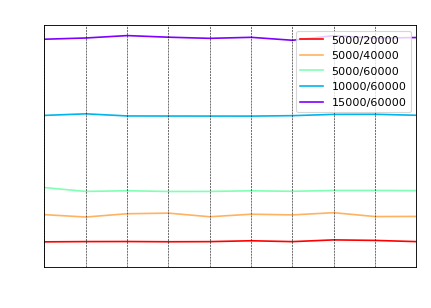

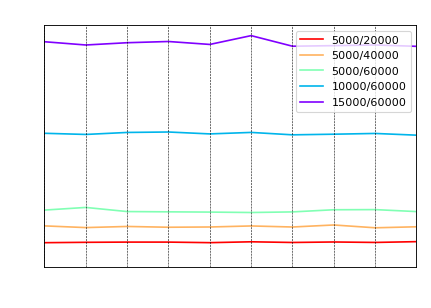

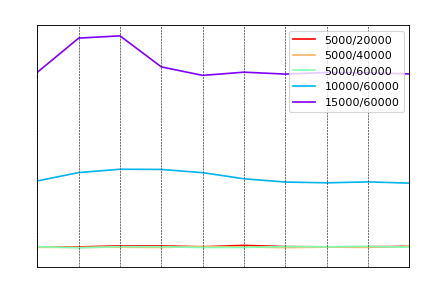

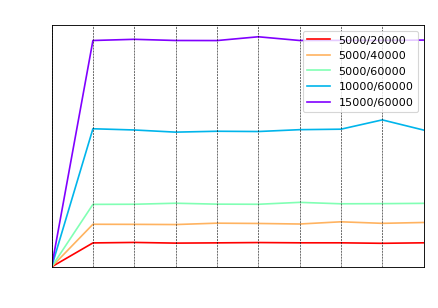

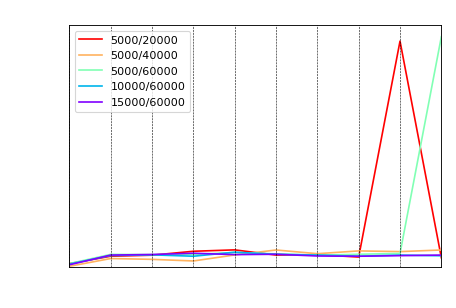

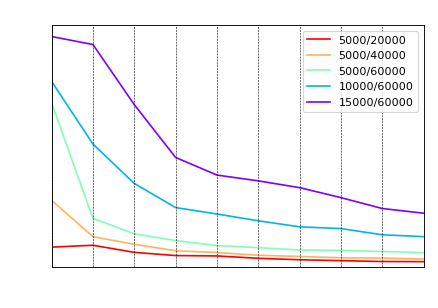

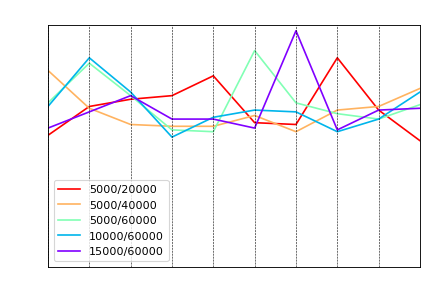

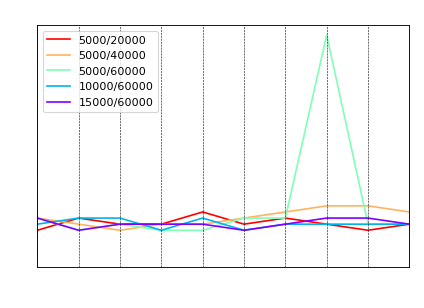

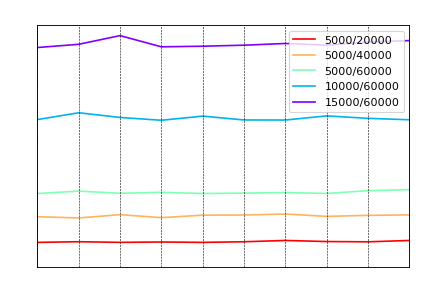

In [34]:
for check_pt in range(nt):
    colormap = plt.cm.rainbow 
    n_m = [(5000, 20000), (5000, 40000), (5000, 60000), (10000, 60000), (15000, 60000)] 
    colors = [colormap(i) for i in np.linspace(1, 0, len(n_m))] 

    plt.figure(figsize=(6, 4), dpi=80) 
    for i, runtime in enumerate(runtimes[..., check_pt]): 
        plt.plot(np.arange(10)+1, runtime, label='%d/%d' % n_m[i], color=colors[i]) 
    for x in range(10): 
        plt.axvline(x=x+1, color='k', linestyle='--', linewidth=0.5) 
    plt.legend() 
    plt.xticks(np.arange(10)+1) 
    plt.xlim([1, 10]) 
    plt.xlabel('n_jobs', c='w') 
    plt.ylabel('Time (sec)', c='w') 
    plt.ylim(bottom=0) 
    plt.title(f'{ckpt_names[check_pt]} with varying m/n', c='w') 
    plt.tick_params(colors='w')
    plt.show() 

# realistic benchmarks

In [14]:
datasets = [
    ('mnist_test_set', 'image'),
    ('cifar10_test_set', 'image'),
    ('cifar100_test_set', 'image'),
    ('caltech256', 'image'),
    #('imagenet_val_set', 'image'),
    ('20news_test_set', 'text'),
    #('imdb_test_set', 'text'),
    #('amazon', 'text'),
    #('audioset_eval_set', 'audio'),
]

In [3]:
# debug imagenet dataset: why are some pred probs out of range?
dataset = 'imagenet_val_set'
modality = 'image'

pred_probs_fn = '../label-errors/cross_validated_predicted_probabilities/' \
     '{}_pyx.part{}_of_{}.npy'
pred_probs = np.load(pred_probs_fn.format(dataset, 1, 4))

In [5]:
np.max(pred_probs)

27.671192169189453

In [6]:
np.min(pred_probs)

-11.143885612487793

In [13]:
pred_probs

array([[ 8.17872429,  0.18229842,  3.45234299, ..., -0.51478356,
         1.63441372, -1.17606795],
       [ 9.3809967 ,  1.53897691,  2.47664213, ..., -0.61613083,
         1.30158877, -1.39474976],
       [ 4.68821239, -1.58008003, -0.46497825, ..., -1.5550071 ,
        -0.54136276, -1.42563903],
       ...,
       [-1.55305994, -5.18527222,  3.35319948, ..., -4.86513424,
         0.14312328,  2.30910993],
       [-0.9983952 , -4.5345912 ,  1.08085084, ..., -1.63862443,
         3.2444818 , -0.95100963],
       [ 0.15848482, -3.79776573,  2.60681391, ..., -2.97259974,
         1.13159287, -1.23461413]])

In [8]:
errors = (pred_probs > 1) | (pred_probs < 0)

In [9]:
example_err = errors.any(axis=1)

In [10]:
example_err.shape

(12500,)

In [12]:
np.sum(example_err)

12500

In [11]:
for i in range(example_err.shape[0]):
    if example_err[i]:
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114


4414
4415
4416
4417
4418
4419
4420
4421
4422
4423
4424
4425
4426
4427
4428
4429
4430
4431
4432
4433
4434
4435
4436
4437
4438
4439
4440
4441
4442
4443
4444
4445
4446
4447
4448
4449
4450
4451
4452
4453
4454
4455
4456
4457
4458
4459
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4471
4472
4473
4474
4475
4476
4477
4478
4479
4480
4481
4482
4483
4484
4485
4486
4487
4488
4489
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499
4500
4501
4502
4503
4504
4505
4506
4507
4508
4509
4510
4511
4512
4513
4514
4515
4516
4517
4518
4519
4520
4521
4522
4523
4524
4525
4526
4527
4528
4529
4530
4531
4532
4533
4534
4535
4536
4537
4538
4539
4540
4541
4542
4543
4544
4545
4546
4547
4548
4549
4550
4551
4552
4553
4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566
4567
4568
4569
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613


6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112


9412
9413
9414
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9425
9426
9427
9428
9429
9430
9431
9432
9433
9434
9435
9436
9437
9438
9439
9440
9441
9442
9443
9444
9445
9446
9447
9448
9449
9450
9451
9452
9453
9454
9455
9456
9457
9458
9459
9460
9461
9462
9463
9464
9465
9466
9467
9468
9469
9470
9471
9472
9473
9474
9475
9476
9477
9478
9479
9480
9481
9482
9483
9484
9485
9486
9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514
9515
9516
9517
9518
9519
9520
9521
9522
9523
9524
9525
9526
9527
9528
9529
9530
9531
9532
9533
9534
9535
9536
9537
9538
9539
9540
9541
9542
9543
9544
9545
9546
9547
9548
9549
9550
9551
9552
9553
9554
9555
9556
9557
9558
9559
9560
9561
9562
9563
9564
9565
9566
9567
9568
9569
9570
9571
9572
9573
9574
9575
9576
9577
9578
9579
9580
9581
9582
9583
9584
9585
9586
9587
9588
9589
9590
9591
9592
9593
9594
9595
9596
9597
9598
9599
9600
9601
9602
9603
9604
9605
9606
9607
9608
9609
9610
9611


10911
10912
10913
10914
10915
10916
10917
10918
10919
10920
10921
10922
10923
10924
10925
10926
10927
10928
10929
10930
10931
10932
10933
10934
10935
10936
10937
10938
10939
10940
10941
10942
10943
10944
10945
10946
10947
10948
10949
10950
10951
10952
10953
10954
10955
10956
10957
10958
10959
10960
10961
10962
10963
10964
10965
10966
10967
10968
10969
10970
10971
10972
10973
10974
10975
10976
10977
10978
10979
10980
10981
10982
10983
10984
10985
10986
10987
10988
10989
10990
10991
10992
10993
10994
10995
10996
10997
10998
10999
11000
11001
11002
11003
11004
11005
11006
11007
11008
11009
11010
11011
11012
11013
11014
11015
11016
11017
11018
11019
11020
11021
11022
11023
11024
11025
11026
11027
11028
11029
11030
11031
11032
11033
11034
11035
11036
11037
11038
11039
11040
11041
11042
11043
11044
11045
11046
11047
11048
11049
11050
11051
11052
11053
11054
11055
11056
11057
11058
11059
11060
11061
11062
11063
11064
11065
11066
11067
11068
11069
11070
11071
11072
11073
11074
11075
11076
1107

12411
12412
12413
12414
12415
12416
12417
12418
12419
12420
12421
12422
12423
12424
12425
12426
12427
12428
12429
12430
12431
12432
12433
12434
12435
12436
12437
12438
12439
12440
12441
12442
12443
12444
12445
12446
12447
12448
12449
12450
12451
12452
12453
12454
12455
12456
12457
12458
12459
12460
12461
12462
12463
12464
12465
12466
12467
12468
12469
12470
12471
12472
12473
12474
12475
12476
12477
12478
12479
12480
12481
12482
12483
12484
12485
12486
12487
12488
12489
12490
12491
12492
12493
12494
12495
12496
12497
12498
12499


In [15]:
real_labels = []
real_pred_probs = []

for (dataset, modality) in datasets:
    title = 'Dataset: ' + dataset.capitalize()
    print('='*len(title), title, '='*len(title), sep='\n')
    
    # Get the cross-validated predicted probabilities on the test set.
    if dataset == 'amazon' or dataset == 'imagenet_val_set':
        n_parts = 3 if dataset == 'amazon' else 4
        pred_probs_fn = '../label-errors/cross_validated_predicted_probabilities/' \
             '{}_pyx.part{}_of_{}.npy'
        parts = [np.load(pred_probs_fn.format(dataset, i + 1, n_parts)) for i in range(n_parts)]
        pred_probs = np.vstack(parts)
        real_pred_probs.append(pred_probs)
    else:
        pred_probs = np.load('../label-errors/cross_validated_predicted_probabilities/' \
            '{}_pyx.npy'.format(dataset), allow_pickle=True)
        real_pred_probs.append(pred_probs)
    # Get the test set labels
    labels = np.load('../label-errors/original_test_labels/'
        '{}_original_labels.npy'.format(dataset), allow_pickle=True)
    real_labels.append(labels)


Dataset: Mnist_test_set
Dataset: Cifar10_test_set
Dataset: Cifar100_test_set
Dataset: Caltech256
Dataset: 20news_test_set


In [16]:
runtimes_cow_spawn = np.zeros((len(real_labels), ncores, nt))
#runtimes_spawn = np.zeros((len(real_labels), ncores, nt))
#runtimes_thread = np.zeros((len(real_labels), ncores, nt))
#runtimes = np.zeros((len(real_labels), ncores, nt))
#runtimes_cow = np.zeros((len(real_labels), ncores, nt))
#runtimes_naive = np.zeros((len(real_labels), ncores, nt))
#runtimes_numba = np.zeros((len(real_labels), ncores, nt))

In [17]:
for i, pred_probs in enumerate(real_pred_probs): # varying number of classes 
    print(f"starting dataset {datasets[i][0]}")
    labels = real_labels[i]
    for n_jobs in range(ncores): 
        print(f"n_jobs {n_jobs+1}")
        # original implementation
        #issues, times = find_label_issues_bench(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        #runtimes[i, n_jobs, :] = times
        
        # cow
        #issues_cow, times_cow = find_label_issues_cow(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        #runtimes_cow[i, n_jobs, :] = times_cow

        # spawn but run with fork
        issues_cow_spawn, times_cow_spawn = find_label_issues_cow_spawn(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        runtimes_cow_spawn[i, n_jobs, :] = times_cow_spawn
        
        # spawn
        #issues_spawn, times_spawn = find_label_issues_cow_spawn(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        #runtimes_spawn[i, n_jobs, :] = times_spawn
        
        # thread
        #issues_thread, times_thread = find_label_issues_thread(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        #runtimes_thread[i, n_jobs, :] = times_thread
        
        # naive implementation with fork
        #issues_naive, times_naive = find_label_issues_naive(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        #runtimes_naive[i, n_jobs, :] = times_naive
        
        # numba
        #issues_numba, times_numba = find_label_issues_numba(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        #runtimes_numba[i, n_jobs, :] = times_numba
        
        # check everyone got the same answer
        #diff1 = np.sum(issues ^ issues_cow)
        #if diff1 != 0:
        #    print(f"original and cow don't match on {diff1}")
        #diff2 = np.sum(issues_cow ^ issues_naive)
        #if diff2 != 0:
        #    print(f"cow and naive don't match on {diff2}")
        #diff3 = np.sum(issues_naive ^ issues_numba)
        #if diff3 != 0:
        #    print(f"numba and naive don't match on {diff3}")
        #diff4 = np.sum(issues ^ issues_numba)
        #if diff4 != 0:
        #    print(f"original and numba don't match on {diff4}")
    print(f"finished data {datasets[i][0]}") 

np.save("real_data_cow_spawn.npy", runtimes_cow_spawn)
#np.save("real_data_spawn.npy", runtimes_spawn)
#np.save("real_data_thread.npy", runtimes_thread)
#np.save("real_data_original.npy", runtimes)
#np.save("real_data_cow.npy", runtimes_cow)
#np.save("real_data_naive.npy", runtimes_naive)
#np.save("real_data_numba.npy", runtimes_numba)

starting dataset mnist_test_set
n_jobs 1
n_jobs 2
n_jobs 3
n_jobs 4
n_jobs 5
n_jobs 6
n_jobs 7
n_jobs 8
n_jobs 9
n_jobs 10
finished data mnist_test_set
starting dataset cifar10_test_set
n_jobs 1
n_jobs 2
n_jobs 3
n_jobs 4
n_jobs 5
n_jobs 6
n_jobs 7
n_jobs 8
n_jobs 9
n_jobs 10
finished data cifar10_test_set
starting dataset cifar100_test_set
n_jobs 1
n_jobs 2
n_jobs 3
n_jobs 4
n_jobs 5
n_jobs 6
n_jobs 7
n_jobs 8
n_jobs 9
n_jobs 10
finished data cifar100_test_set
starting dataset caltech256
n_jobs 1
n_jobs 2
n_jobs 3
n_jobs 4
n_jobs 5
n_jobs 6
n_jobs 7
n_jobs 8
n_jobs 9
n_jobs 10
finished data caltech256
starting dataset 20news_test_set
n_jobs 1
n_jobs 2
n_jobs 3
n_jobs 4
n_jobs 5
n_jobs 6
n_jobs 7
n_jobs 8
n_jobs 9
n_jobs 10
finished data 20news_test_set


In [27]:
a = np.arange(100).reshape(10,10)

In [28]:
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [29]:
b = 9 - np.arange(10, dtype=int)

In [30]:
c = a[np.arange(10), b]

In [31]:
c

array([ 9, 18, 27, 36, 45, 54, 63, 72, 81, 90])

# tall benchmarks

In [18]:
n_m = [(1000, 100000), (100, 1000000), (10, 10000000), (1000, 1000000)]

In [19]:
def gen_data(num_classes, num_examples, noise_frac=0.2, realistic=True):
    if not realistic:
        # faster
        labels = np.random.randint(0, num_classes, size=num_examples)
        labels[:num_classes] = np.arange(num_classes)  # ensure all classes represented
        data = np.random.random((num_examples, num_classes))
        data /= data.sum(axis=1)[:, None]
        return labels, data
    # below copied from Curtis:
    error_idxs = np.random.choice(
        np.arange(num_examples),
        size=int(round(noise_frac * num_examples)),
        replace=False,
    )
    pred_probs = np.random.dirichlet(
        np.ones(num_classes) / (1 * num_classes), size=num_examples
    )  # 10 * num_classes
    true = pred_probs.argmax(axis=1)
    labels = np.copy(true)
    # Randomly flip noise_frac of the labels
    labels[error_idxs] = [
        np.random.choice(np.delete(np.arange(num_classes), true[i]), size=1)[0]
        for i in error_idxs
    ]
    return labels, pred_probs

In [20]:
#runtimes = np.zeros((len(n_m), ncores, nt))
#runtimes_cow = np.zeros((len(n_m), ncores, nt))
#runtimes_naive = np.zeros((len(n_m), ncores, nt))
#runtimes_numba = np.zeros((len(n_m), ncores, nt))
#runtimes_spawn = np.zeros((len(n_m), ncores, nt))
#runtimes_thread = np.zeros((len(n_m), ncores, nt))
runtimes_cow_spawn = np.zeros((len(n_m), ncores, nt))

In [21]:
for i, nm in enumerate(n_m): # varying number of classes 
    print(f"starting nm {nm}")
    labels, pred_probs = gen_data(nm[0], nm[1])
    for n_jobs in range(ncores): 
        print(f"n_jobs {n_jobs+1}")
        # spawn run with fork
        issues_cow_spawn, times_cow_spawn = find_label_issues_cow_spawn(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        runtimes_cow_spawn[i, n_jobs, :] = times_cow_spawn
        
        ## spawn
        #issues_spawn, times_spawn = find_label_issues_cow_spawn(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        #runtimes_spawn[i, n_jobs, :] = times_spawn
        #
        ## thread
        #issues_thread, times_thread = find_label_issues_thread(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        #runtimes_thread[i, n_jobs, :] = times_thread
        
        ## original implementation
        #issues, times = find_label_issues_bench(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        #runtimes[i, n_jobs, :] = times
        #
        ## cow
        #issues_cow, times_cow = find_label_issues_cow(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        #runtimes_cow[i, n_jobs, :] = times_cow
        #
        ## naive implementation with fork
        #issues_naive, times_naive = find_label_issues_naive(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        #runtimes_naive[i, n_jobs, :] = times_naive
        #
        ## numba
        #issues_numba, times_numba = find_label_issues_numba(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        #runtimes_numba[i, n_jobs, :] = times_numba
        
        # check everyone got the same answer
        #diff1 = np.sum(issues ^ issues_cow)
        #if diff1 != 0:
        #    print(f"original and cow don't match on {diff1}")
        #diff2 = np.sum(issues_cow ^ issues_naive)
        #if diff2 != 0:
        #    print(f"cow and naive don't match on {diff2}")
        #diff3 = np.sum(issues_naive ^ issues_numba)
        #if diff3 != 0:
        #    print(f"numba and naive don't match on {diff3}")
        #diff4 = np.sum(issues ^ issues_numba)
        #if diff4 != 0:
        #    print(f"original and numba don't match on {diff4}")
    print(f"finished nm {nm}") 

np.save("tall_cow_spawn.npy", runtimes_cow_spawn)
#np.save("tall_spawn.npy", runtimes_spawn)
#np.save("tall_thread.npy", runtimes_thread)
#np.save("tall_original.npy", runtimes)
#np.save("tall_cow.npy", runtimes_cow)
#np.save("tall_naive.npy", runtimes_naive)
#np.save("tall_numba.npy", runtimes_numba)

starting nm (1000, 100000)
n_jobs 1
n_jobs 2
n_jobs 3
n_jobs 4
n_jobs 5
n_jobs 6
n_jobs 7
n_jobs 8
n_jobs 9
n_jobs 10
finished nm (1000, 100000)
starting nm (100, 1000000)
n_jobs 1
n_jobs 2
n_jobs 3
n_jobs 4
n_jobs 5
n_jobs 6
n_jobs 7
n_jobs 8
n_jobs 9
n_jobs 10
finished nm (100, 1000000)
starting nm (10, 10000000)
n_jobs 1
n_jobs 2
n_jobs 3
n_jobs 4
n_jobs 5
n_jobs 6
n_jobs 7
n_jobs 8
n_jobs 9
n_jobs 10
finished nm (10, 10000000)
starting nm (1000, 1000000)
n_jobs 1
n_jobs 2
n_jobs 3
n_jobs 4
n_jobs 5
n_jobs 6
n_jobs 7
n_jobs 8
n_jobs 9
n_jobs 10
finished nm (1000, 1000000)


In [23]:
np.save("tall_original.npy", runtimes)
np.save("tall_cow.npy", runtimes_cow)
np.save("tall_naive.npy", runtimes_naive)
np.save("tall_numba.npy", runtimes_numba)

# benchmarking cow

## debugging cow

I've debugged cow and it seems to be working for prune by count

In [13]:
# cow seems to give different outputs than eveyone else
n = 20
m = 5
pred_probs = np.random.randint(low=1, high=100, size=[n, m], dtype=np.uint8) 
pred_probs = normalize(pred_probs) 
labels = np.repeat(np.arange(m), n // m) 

In [14]:
issues, _ = find_label_issues_bench(pred_probs=pred_probs, labels=labels, n_jobs=1) 

# cow
issues_cow, _ = find_label_issues_cow_spawn(pred_probs=pred_probs, labels=labels, n_jobs=1) 

# naive implementation with fork
issues_thread, _ = find_label_issues_thread(pred_probs=pred_probs, labels=labels, n_jobs=1) 

# numba
#issues_numba, _ = find_label_issues_numba(pred_probs=pred_probs, labels=labels, n_jobs=1) 

In [15]:
issues

array([False, False, False, False, False,  True, False,  True, False,
        True,  True,  True, False, False,  True,  True, False,  True,
        True,  True])

In [18]:
issues_cow

array([False, False, False, False, False,  True, False,  True, False,
        True,  True,  True, False, False,  True,  True, False,  True,
        True,  True])

In [19]:
issues_thread

array([False, False, False, False, False,  True, False,  True, False,
        True,  True,  True, False, False,  True,  True, False,  True,
        True,  True])

## cow plots

In [11]:
np.random.seed(0) 
for i, nm in enumerate(n_m): # varying number of classes 
    print(f"starting pair {nm}")
    n = nm[1]
    m = nm[0]
    pred_probs = np.random.randint(low=1, high=100, size=[n, m], dtype=np.uint8) 
    pred_probs = normalize(pred_probs) 
    labels = np.repeat(np.arange(m), n // m) 
    for n_jobs in range(ncores): 
        print(f"n_jobs {n_jobs+1}")
        _, times = find_label_issues_cow(pred_probs=pred_probs, labels=labels, n_jobs=n_jobs+1) 
        runtimes[i, n_jobs, :] = times
    print(f"finished pair {nm}") 
    
np.save('cow_varying_nm.npy', runtimes) 

starting pair (5000, 20000)
n_jobs 1
n_jobs 2
n_jobs 3
n_jobs 4
n_jobs 5
n_jobs 6
n_jobs 7
n_jobs 8
n_jobs 9
n_jobs 10
finished pair (5000, 20000)
starting pair (5000, 40000)
n_jobs 1
n_jobs 2
n_jobs 3
n_jobs 4
n_jobs 5
n_jobs 6
n_jobs 7
n_jobs 8
n_jobs 9
n_jobs 10
finished pair (5000, 40000)
starting pair (5000, 60000)
n_jobs 1
n_jobs 2
n_jobs 3
n_jobs 4
n_jobs 5
n_jobs 6
n_jobs 7
n_jobs 8
n_jobs 9
n_jobs 10
finished pair (5000, 60000)
starting pair (10000, 60000)
n_jobs 1
n_jobs 2
n_jobs 3
n_jobs 4
n_jobs 5
n_jobs 6
n_jobs 7
n_jobs 8
n_jobs 9
n_jobs 10
finished pair (10000, 60000)
starting pair (15000, 60000)
n_jobs 1
n_jobs 2
n_jobs 3
n_jobs 4
n_jobs 5
n_jobs 6
n_jobs 7
n_jobs 8
n_jobs 9
n_jobs 10
finished pair (15000, 60000)


In [13]:
runtime_totals = np.cumsum(runtimes, axis=-1)

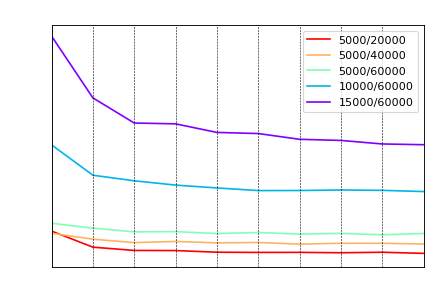

In [14]:
colormap = plt.cm.rainbow 
n_m = [(5000, 20000), (5000, 40000), (5000, 60000), (10000, 60000), (15000, 60000)] 
colors = [colormap(i) for i in np.linspace(1, 0, len(n_m))] 

plt.figure(figsize=(6, 4), dpi=80) 
for i, runtime in enumerate(runtime_totals[..., -1]): 
    plt.plot(np.arange(10)+1, runtime, label='%d/%d' % n_m[i], color=colors[i]) 
for x in range(10): 
    plt.axvline(x=x+1, color='k', linestyle='--', linewidth=0.5) 
plt.legend() 
plt.xticks(np.arange(10)+1) 
plt.xlim([1, 10]) 
plt.xlabel('n_jobs', c='w') 
plt.ylabel('Time (sec)', c='w') 
plt.ylim(bottom=0) 
plt.title('total times with varying m/n', c='w') 
plt.tick_params(colors='w')
plt.show() 

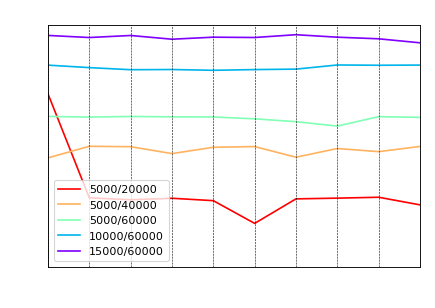

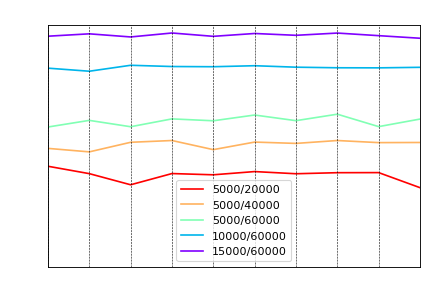

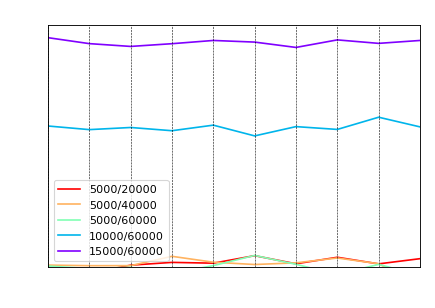

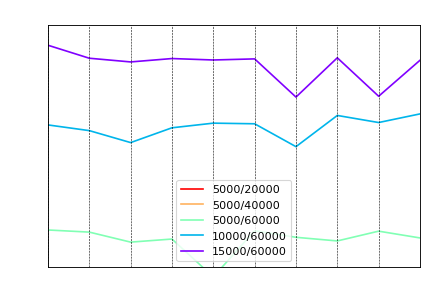

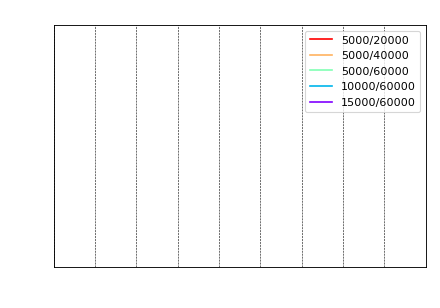

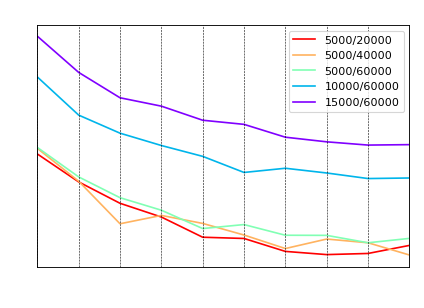

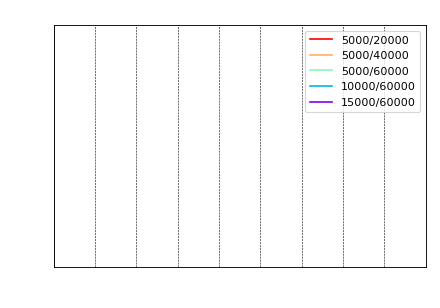

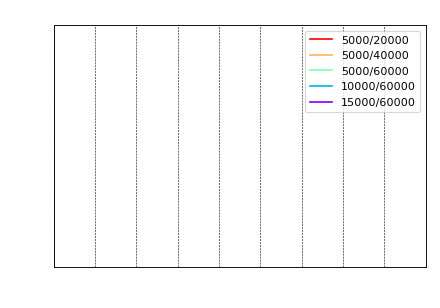

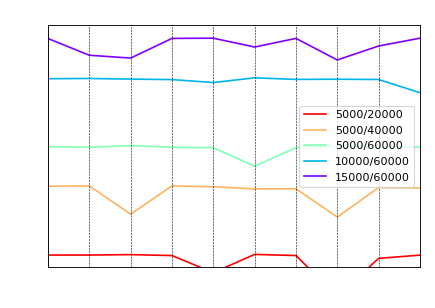

In [16]:
for check_pt in range(nt):
    colormap = plt.cm.rainbow 
    n_m = [(5000, 20000), (5000, 40000), (5000, 60000), (10000, 60000), (15000, 60000)] 
    colors = [colormap(i) for i in np.linspace(1, 0, len(n_m))] 

    plt.figure(figsize=(6, 4), dpi=80) 
    for i, runtime in enumerate(runtimes[..., check_pt]): 
        plt.plot(np.arange(10)+1, np.log(runtime), label='%d/%d' % n_m[i], color=colors[i]) 
    for x in range(10): 
        plt.axvline(x=x+1, color='k', linestyle='--', linewidth=0.5) 
    plt.legend() 
    plt.xticks(np.arange(10)+1) 
    plt.xlim([1, 10]) 
    plt.xlabel('n_jobs', c='w') 
    plt.ylabel('Time (sec)', c='w') 
    plt.ylim(bottom=0) 
    plt.title(f'{ckpt_names[check_pt]} with varying m/n', c='w') 
    plt.tick_params(colors='w')
    plt.show() 

# generate plots

In [22]:
ckpt_names = ['initial checks', 'calc confident joint', 'preproc for prune', 'load to RawArray for multiproc', 'prune by class', 'prune by count', 'confident learning', 'pred neq', 'final processing']

In [23]:
runtimes_orig = np.load("parallel_results/vary_nm_original.npy")
runtimes_naive = np.load("parallel_results/vary_nm_naive.npy")
runtimes_numba = np.load("parallel_results/vary_nm_numba.npy")
runtimes_cow = np.load("parallel_results/vary_nm_cow.npy")
runtimes_spawn = np.load("parallel_results/vary_nm_spawn.npy")
runtimes_thread = np.load("parallel_results/vary_nm_thread.npy")
runtimes_cow_spawn = np.load("parallel_results/vary_nm_cow_spawn.npy")

In [24]:
run_total_orig = np.cumsum(runtimes_orig, axis=-1)
run_total_naive = np.cumsum(runtimes_naive, axis=-1)
run_total_numba = np.cumsum(runtimes_numba, axis=-1)
run_total_cow = np.cumsum(runtimes_cow, axis=-1)
run_total_spawn = np.cumsum(runtimes_spawn, axis=-1)
run_total_thread = np.cumsum(runtimes_thread, axis=-1)
run_total_cow_spawn = np.cumsum(runtimes_cow_spawn, axis=-1)

In [25]:
parallel_orig = runtimes_orig[:,:,3] + runtimes_orig[:,:,5]
parallel_naive = runtimes_naive[:,:,3] + runtimes_naive[:,:,5]
parallel_cow = runtimes_cow[:,:,3] + runtimes_cow[:,:,5]
parallel_spawn = runtimes_spawn[:,:,3] + runtimes_spawn[:,:,5]
parallel_thread = runtimes_thread[:,:,3] + runtimes_thread[:,:,5]

In [26]:
#all_runtimes = [runtimes_orig, runtimes_naive, runtimes_cow, runtimes_thread, runtimes_spawn, runtimes_cow_spawn]
#all_run_totals = [run_total_orig, run_total_naive, run_total_cow, run_total_numba, run_total_spawn, run_total_thread]
all_parallels = [parallel_orig, parallel_naive, parallel_cow, parallel_thread, parallel_spawn]

In [27]:
run_names = ['baseline', 'naive cow', 'pre-slice + cow', 'multithread', 'spawn']
n_m = [(5000, 20000), (5000, 40000), (5000, 60000), (10000, 60000), (15000, 60000)] 

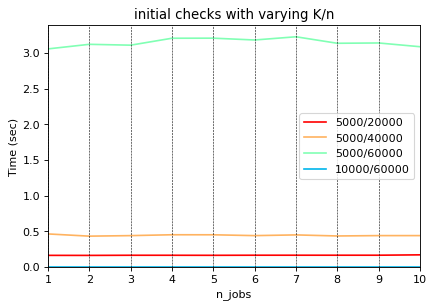

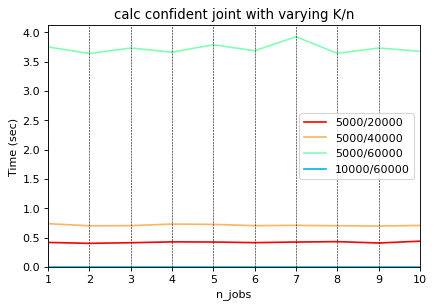

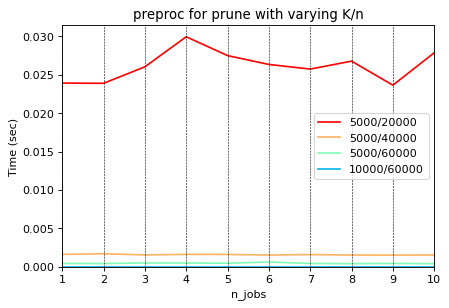

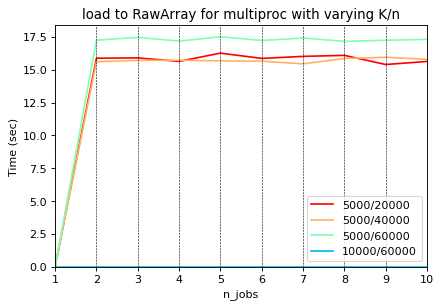

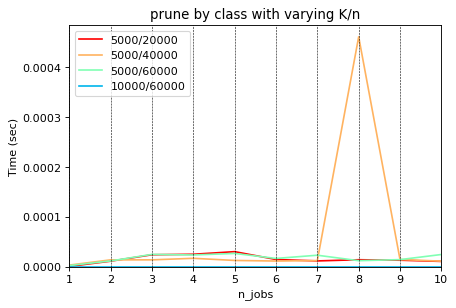

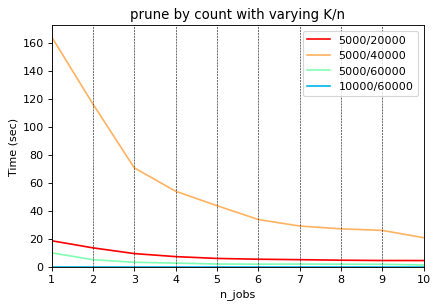

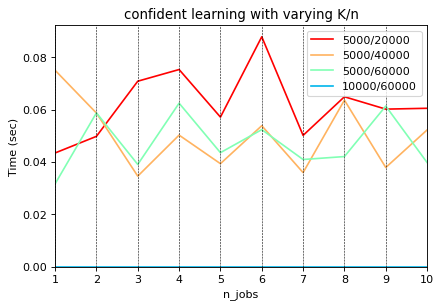

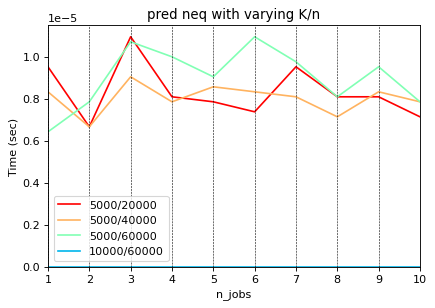

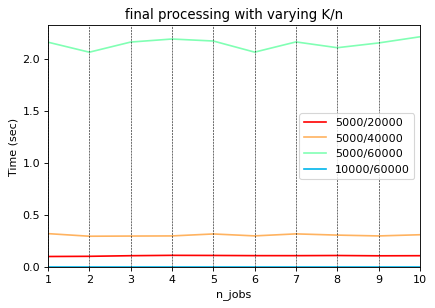

In [44]:
# show all of time points of original run
for check_pt in range(nt):
    colormap = plt.cm.rainbow 
    n_m = [(5000, 20000), (5000, 40000), (5000, 60000), (10000, 60000), (15000, 60000)] 
    colors = [colormap(i) for i in np.linspace(1, 0, len(n_m))] 

    plt.figure(figsize=(6, 4), dpi=80) 
    for i, runtime in enumerate(runtimes_orig[..., check_pt]): 
        plt.plot(np.arange(10)+1, runtime, label='%d/%d' % n_m[i], color=colors[i]) 
    for x in range(10): 
        plt.axvline(x=x+1, color='k', linestyle='--', linewidth=0.5) 
    plt.legend() 
    plt.xticks(np.arange(10)+1) 
    plt.xlim([1, 10]) 
    plt.xlabel('n_jobs') 
    plt.ylabel('Time (sec)') 
    plt.ylim(bottom=0) 
    plt.title(f'{ckpt_names[check_pt]} with varying K/n') 
    #plt.tick_params(colors='w')
    plt.show() 

In [28]:
colors = [colormap(i) for i in np.linspace(1, 0, len(n_m))] 

for rn, runtimes in enumerate(all_run_totals):
    plt.figure(figsize=(6, 4), dpi=80) 
    for i, runtime in enumerate(runtimes[..., -1]): 
        plt.plot(np.arange(10)+1, runtime, label='%d/%d' % n_m[i], color=colors[i]) 
    for x in range(10): 
        plt.axvline(x=x+1, color='k', linestyle='--', linewidth=0.5) 
    plt.legend() 
    plt.xticks(np.arange(10)+1) 
    plt.xlim([1, 10]) 
    plt.xlabel('n_jobs') 
    plt.ylabel('Time (sec)') 
    plt.ylim(bottom=0) 
    plt.title(f'{run_names[rn]}, total times with varying K/n', c='w') 
    plt.tick_params(colors='w')
    plt.show() 

NameError: name 'all_run_totals' is not defined

In [36]:
n_m

[(5000, 20000), (5000, 40000), (5000, 60000), (10000, 60000), (15000, 60000)]

<ipython-input-29-87ad9021a9fe>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


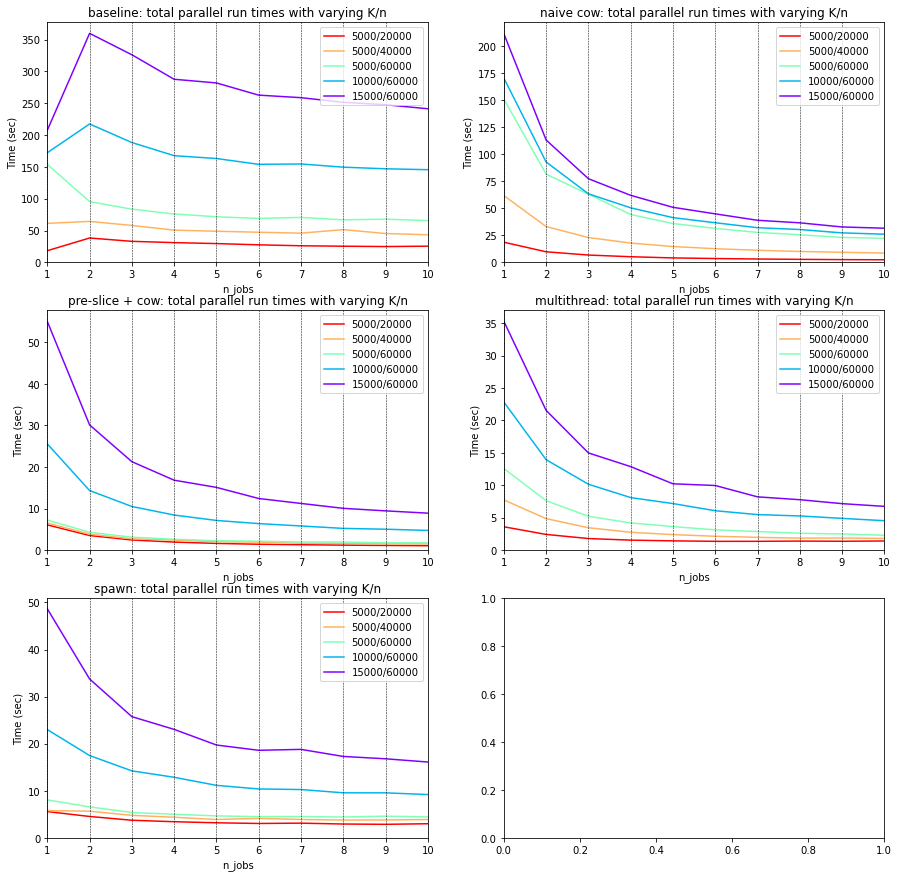

In [29]:
colors = [colormap(i) for i in np.linspace(1, 0, len(n_m))] 
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
ax_ind = [(0,0), (0,1), (1,0), (1,1), (2,0)]
for rn, runtimes in enumerate(all_parallels):
    for i, runtime in enumerate(runtimes): 
        ax[ax_ind[rn]].plot(np.arange(10)+1, runtime, label='%d/%d' % n_m[i], color=colors[i]) 
    for x in range(10): 
        ax[ax_ind[rn]].axvline(x=x+1, color='k', linestyle='--', linewidth=0.5) 
    ax[ax_ind[rn]].legend() 
    ax[ax_ind[rn]].set_xticks(np.arange(10)+1) 
    ax[ax_ind[rn]].set_xlim([1, 10]) 
    ax[ax_ind[rn]].set_xlabel('n_jobs') 
    ax[ax_ind[rn]].set_ylabel('Time (sec)') 
    ax[ax_ind[rn]].set_ylim(bottom=0) 
    ax[ax_ind[rn]].set_title(f'{run_names[rn]}: total parallel run times with varying K/n') 
    #ax[ax_ind[rn]].set_tick_params(colors='w')
fig.show()
#fig.savefig("total_runtimes.png")

<ipython-input-17-64ee0f367822>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


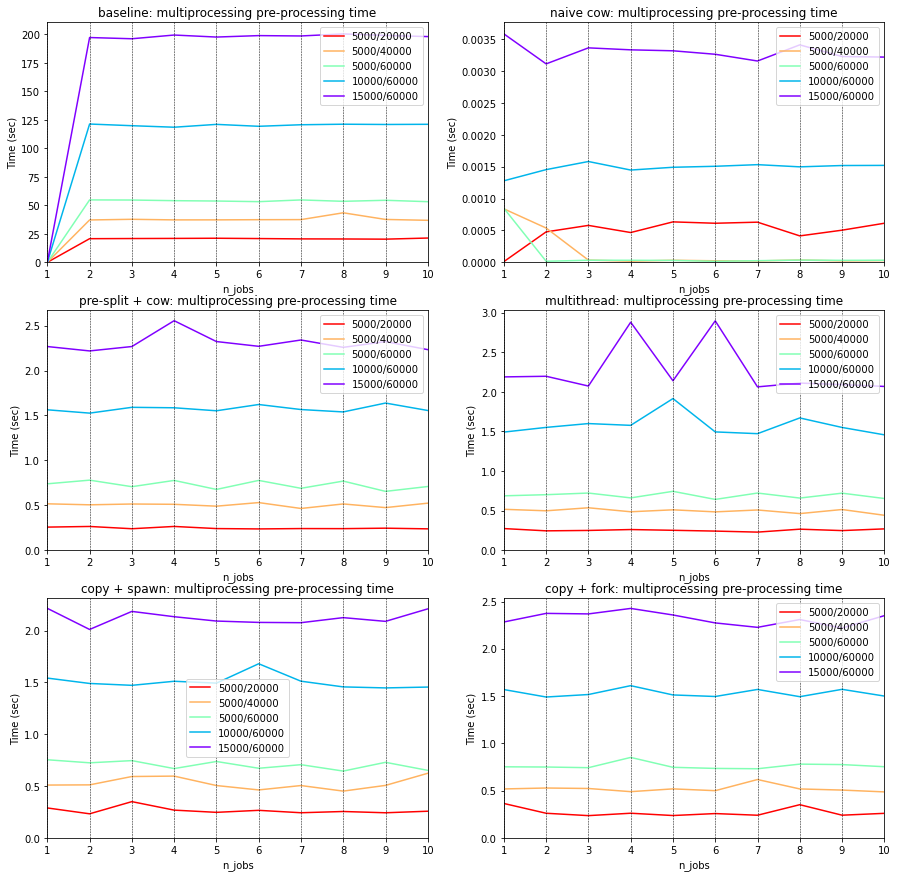

In [17]:
colors = [colormap(i) for i in np.linspace(1, 0, len(n_m))] 
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
ax_ind = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]
for rn, runtimes in enumerate(all_runtimes):
    for i, runtime in enumerate(runtimes[..., 3]): 
        ax[ax_ind[rn]].plot(np.arange(10)+1, runtime, label='%d/%d' % n_m[i], color=colors[i]) 
    for x in range(10): 
        ax[ax_ind[rn]].axvline(x=x+1, color='k', linestyle='--', linewidth=0.5) 
    ax[ax_ind[rn]].legend() 
    ax[ax_ind[rn]].set_xticks(np.arange(10)+1) 
    ax[ax_ind[rn]].set_xlim([1, 10]) 
    ax[ax_ind[rn]].set_xlabel('n_jobs') 
    ax[ax_ind[rn]].set_ylabel('Time (sec)') 
    ax[ax_ind[rn]].set_ylim(bottom=0) 
    ax[ax_ind[rn]].set_title(f'{run_names[rn]}: multiprocessing pre-processing time') 
    #ax[ax_ind[rn]].set_tick_params(colors='w')
fig.show()
#fig.savefig("preprocessing.png")

<ipython-input-19-65f99064ce5c>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


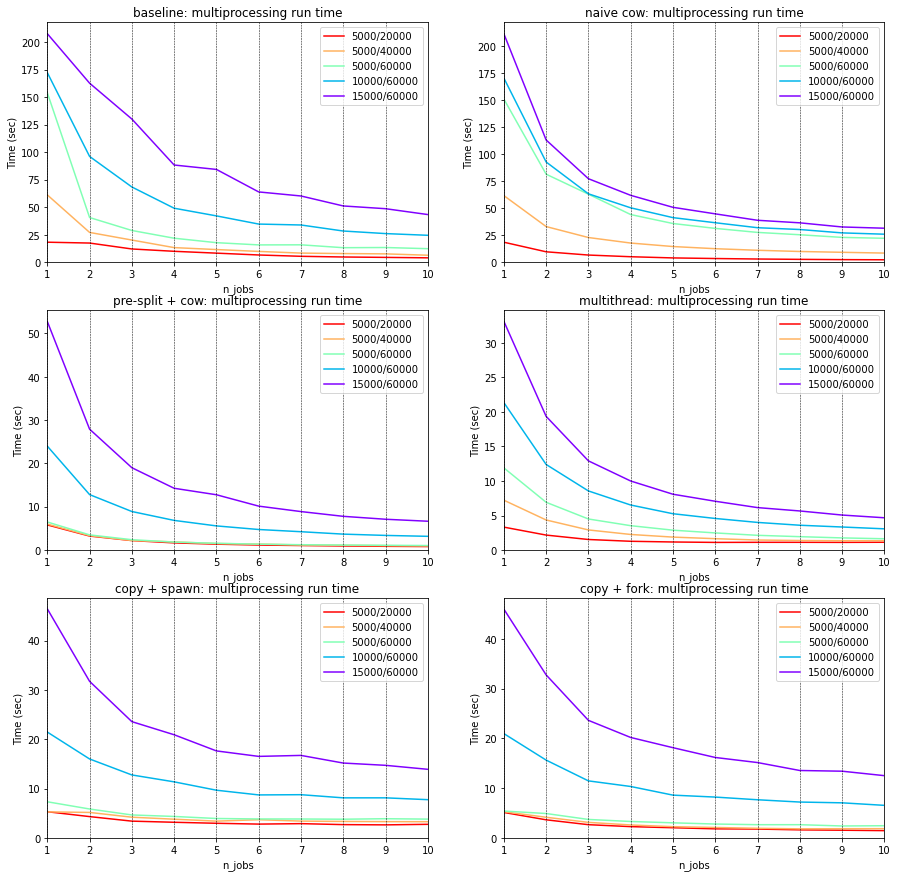

In [19]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
ax_ind = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]
for rn, runtimes in enumerate(all_runtimes):
    for i, runtime in enumerate(runtimes[..., 5]): 
        ax[ax_ind[rn]].plot(np.arange(10)+1, runtime, label='%d/%d' % n_m[i], color=colors[i]) 
    for x in range(10): 
        ax[ax_ind[rn]].axvline(x=x+1, color='k', linestyle='--', linewidth=0.5) 
    ax[ax_ind[rn]].legend() 
    ax[ax_ind[rn]].set_xticks(np.arange(10)+1) 
    ax[ax_ind[rn]].set_xlim([1, 10]) 
    ax[ax_ind[rn]].set_xlabel('n_jobs') 
    ax[ax_ind[rn]].set_ylabel('Time (sec)') 
    ax[ax_ind[rn]].set_ylim(bottom=0) 
    ax[ax_ind[rn]].set_title(f'{run_names[rn]}: multiprocessing run time') 
    #ax[ax_ind[rn]].tick_params(colors='w')
fig.show()
#fig.savefig("multiprocessing.png")

### real data

In [30]:
runtimes_orig = np.load("parallel_results/real_data_original.npy")
runtimes_naive = np.load("parallel_results/real_data_naive.npy")
runtimes_numba = np.load("parallel_results/real_data_numba.npy")
runtimes_cow = np.load("parallel_results/real_data_cow.npy")
runtimes_spawn = np.load("parallel_results/real_data_spawn.npy")
runtimes_thread = np.load("parallel_results/real_data_thread.npy")
runtimes_cow_spawn = np.load("parallel_results/real_data_cow_spawn.npy")

all_runtimes = [runtimes_orig, runtimes_naive, runtimes_cow, runtimes_thread, runtimes_spawn, runtimes_cow_spawn]

In [31]:
parallel_orig = runtimes_orig[:,:,3] + runtimes_orig[:,:,5]
parallel_naive = runtimes_naive[:,:,3] + runtimes_naive[:,:,5]
parallel_cow = runtimes_cow[:,:,3] + runtimes_cow[:,:,5]
parallel_spawn = runtimes_spawn[:,:,3] + runtimes_spawn[:,:,5]
parallel_thread = runtimes_thread[:,:,3] + runtimes_thread[:,:,5]

all_parallels = [parallel_orig, parallel_naive, parallel_cow, parallel_thread, parallel_spawn]

In [32]:
n_m = [(1000, 100000), (100, 1000000), (10, 10000000), (1000, 1000000)]
run_names = ['baseline', 'naive cow', 'pre-split + cow', 'multithread', 'spawn']

In [33]:
datasets = [
    ('mnist_test_set', 'image'),
    ('cifar10_test_set', 'image'),
    ('cifar100_test_set', 'image'),
    ('caltech256', 'image'),
    #('imagenet_val_set', 'image'),
    ('20news_test_set', 'text'),
    #('imdb_test_set', 'text'),
    #('amazon', 'text'),
    #('audioset_eval_set', 'audio'),
]

In [34]:
colors = [colormap(i) for i in np.linspace(1, 0, len(datasets))] 

<ipython-input-35-63ba01275f71>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


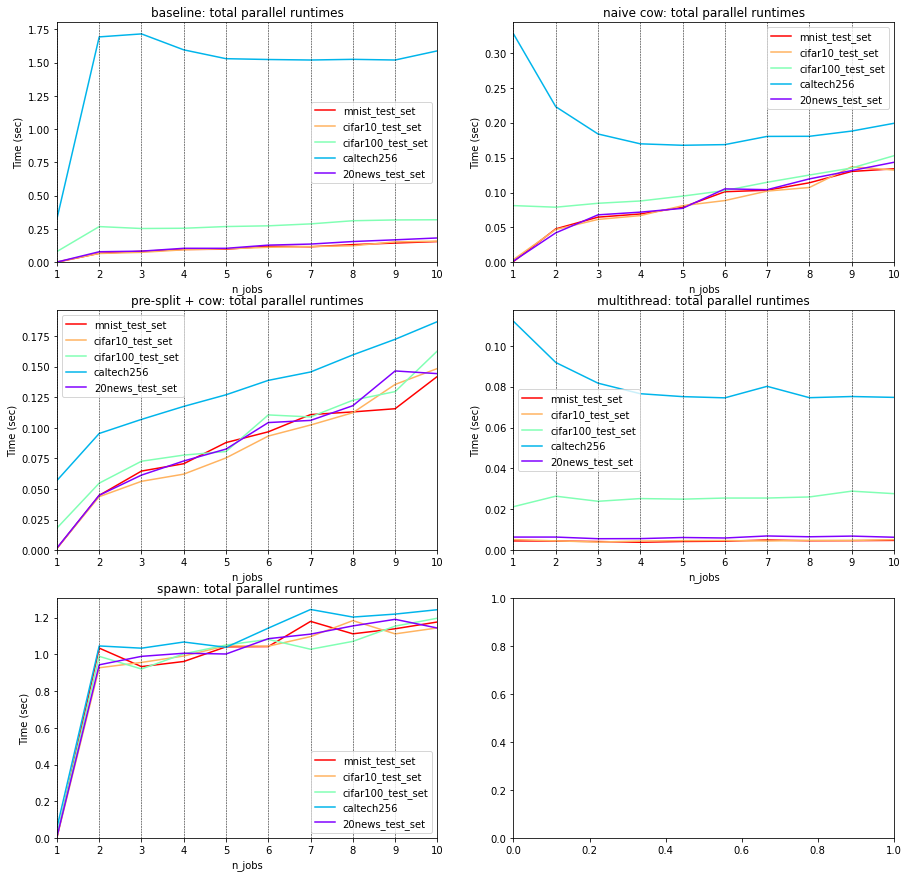

In [35]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
ax_ind = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]
for rn, runtimes in enumerate(all_parallels):
    for i, runtime in enumerate(runtimes): 
        ax[ax_ind[rn]].plot(np.arange(10)+1, runtime, label=f"{datasets[i][0]}", color=colors[i]) 
    for x in range(10): 
        ax[ax_ind[rn]].axvline(x=x+1, color='k', linestyle='--', linewidth=0.5) 
    ax[ax_ind[rn]].legend() 
    ax[ax_ind[rn]].set_xticks(np.arange(10)+1) 
    ax[ax_ind[rn]].set_xlim([1, 10]) 
    ax[ax_ind[rn]].set_xlabel('n_jobs') 
    ax[ax_ind[rn]].set_ylabel('Time (sec)') 
    ax[ax_ind[rn]].set_ylim(bottom=0) 
    ax[ax_ind[rn]].set_title(f'{run_names[rn]}: total parallel runtimes') 
    #ax[ax_ind[rn]].set_tick_params(colors='w')
fig.show()
#fig.savefig("preprocessing.png")

<ipython-input-45-234a0d7a4991>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


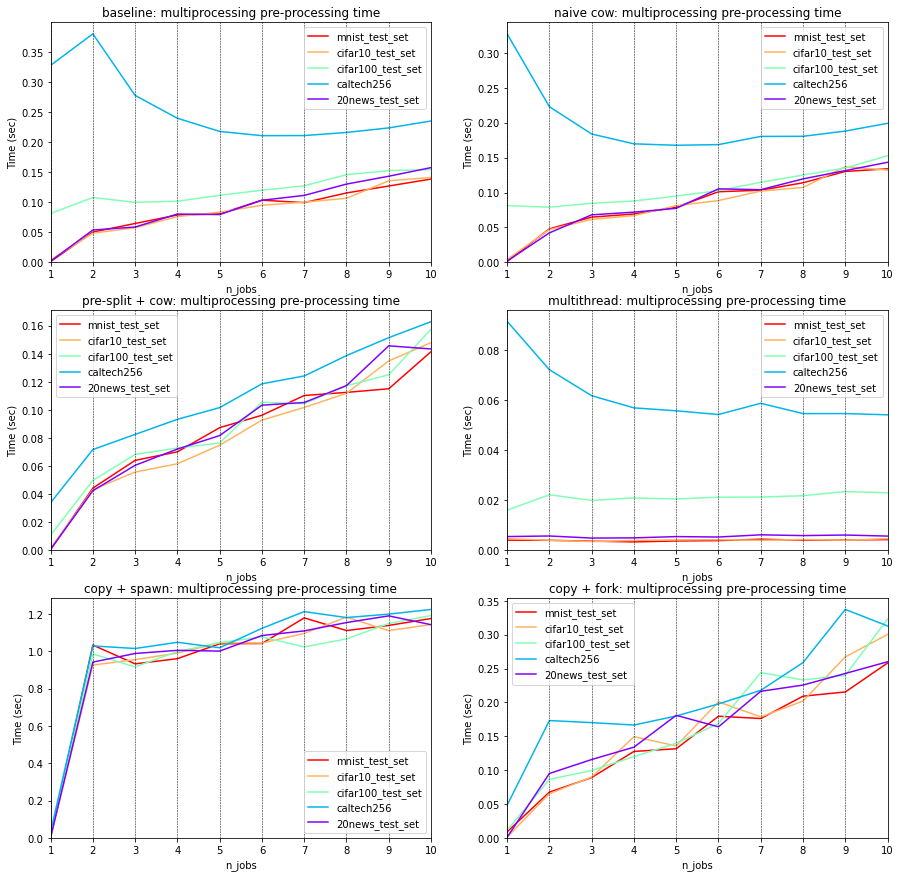

In [45]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
ax_ind = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]
for rn, runtimes in enumerate(all_runtimes):
    for i, runtime in enumerate(runtimes[..., 5]): 
        ax[ax_ind[rn]].plot(np.arange(10)+1, runtime, label=f"{datasets[i][0]}", color=colors[i]) 
    for x in range(10): 
        ax[ax_ind[rn]].axvline(x=x+1, color='k', linestyle='--', linewidth=0.5) 
    ax[ax_ind[rn]].legend() 
    ax[ax_ind[rn]].set_xticks(np.arange(10)+1) 
    ax[ax_ind[rn]].set_xlim([1, 10]) 
    ax[ax_ind[rn]].set_xlabel('n_jobs') 
    ax[ax_ind[rn]].set_ylabel('Time (sec)') 
    ax[ax_ind[rn]].set_ylim(bottom=0) 
    ax[ax_ind[rn]].set_title(f'{run_names[rn]}: multiprocessing pre-processing time') 
    #ax[ax_ind[rn]].set_tick_params(colors='w')
fig.show()
#fig.savefig("preprocessing.png")

### tall data

In [36]:
runtimes_orig = np.load("parallel_results/tall_original.npy")
runtimes_naive = np.load("parallel_results/tall_naive.npy")
runtimes_numba = np.load("parallel_results/tall_numba.npy")
runtimes_cow = np.load("parallel_results/tall_cow.npy")
runtimes_spawn = np.load("parallel_results/tall_spawn.npy")
runtimes_thread = np.load("parallel_results/tall_thread.npy")
runtimes_cow_spawn = np.load("parallel_results/tall_cow_spawn.npy")

In [37]:
parallel_orig = runtimes_orig[:,:,3] + runtimes_orig[:,:,5]
parallel_naive = runtimes_naive[:,:,3] + runtimes_naive[:,:,5]
parallel_cow = runtimes_cow[:,:,3] + runtimes_cow[:,:,5]
parallel_spawn = runtimes_spawn[:,:,3] + runtimes_spawn[:,:,5]
parallel_thread = runtimes_thread[:,:,3] + runtimes_thread[:,:,5]

In [38]:
n_m = [(1000, 100000), (100, 1000000), (10, 10000000), (1000, 1000000)]
run_names = ['baseline', 'naive cow', 'pre-slice + cow', 'multithread', 'spawn']

In [39]:
#all_runtimes = [runtimes_orig, runtimes_naive, runtimes_cow, runtimes_thread, runtimes_spawn, runtimes_cow_spawn]
all_parallels = [parallel_orig, parallel_naive, parallel_cow, parallel_thread, parallel_spawn]

In [40]:
colors = [colormap(i) for i in np.linspace(1, 0, len(n_m))] 

<ipython-input-41-fe4342219201>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


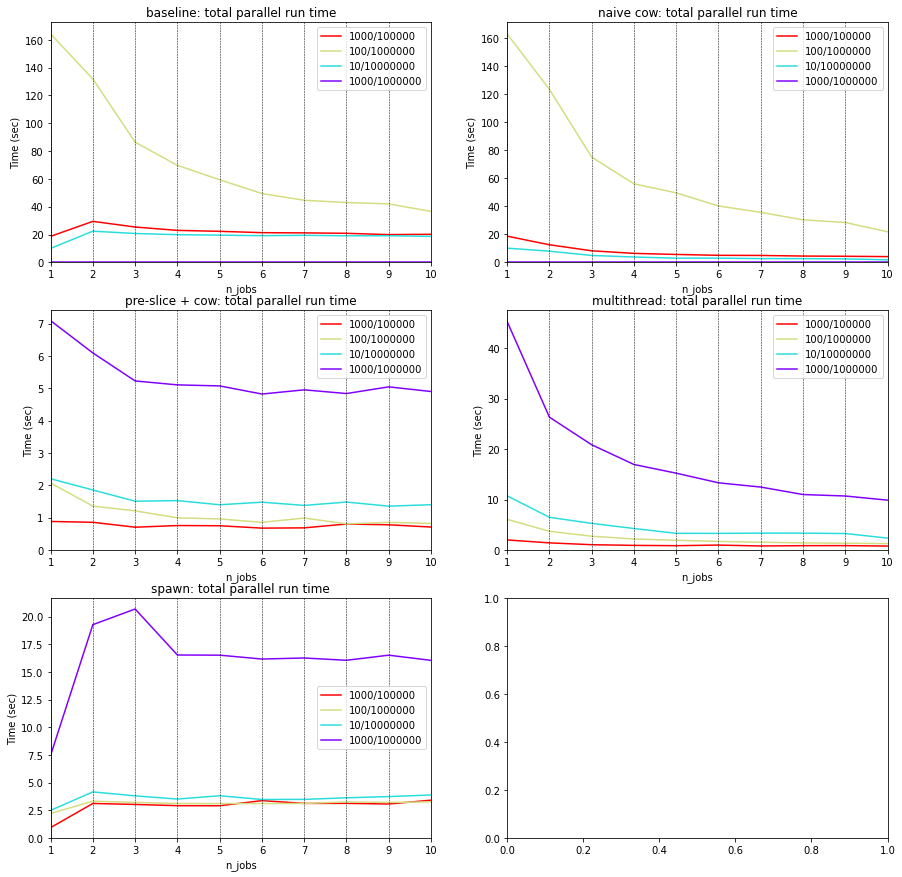

In [41]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
ax_ind = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]
for rn, runtimes in enumerate(all_parallels):
    for i, runtime in enumerate(runtimes): 
        ax[ax_ind[rn]].plot(np.arange(10)+1, runtime, label='%d/%d' % n_m[i], color=colors[i]) 
    for x in range(10): 
        ax[ax_ind[rn]].axvline(x=x+1, color='k', linestyle='--', linewidth=0.5) 
    ax[ax_ind[rn]].legend() 
    ax[ax_ind[rn]].set_xticks(np.arange(10)+1) 
    ax[ax_ind[rn]].set_xlim([1, 10]) 
    ax[ax_ind[rn]].set_xlabel('n_jobs') 
    ax[ax_ind[rn]].set_ylabel('Time (sec)') 
    ax[ax_ind[rn]].set_ylim(bottom=0) 
    ax[ax_ind[rn]].set_title(f'{run_names[rn]}: total parallel run time') 
    #ax[ax_ind[rn]].set_tick_params(colors='w')
fig.show()
#fig.savefig("preprocessing.png")


<ipython-input-17-84bd42df74c7>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


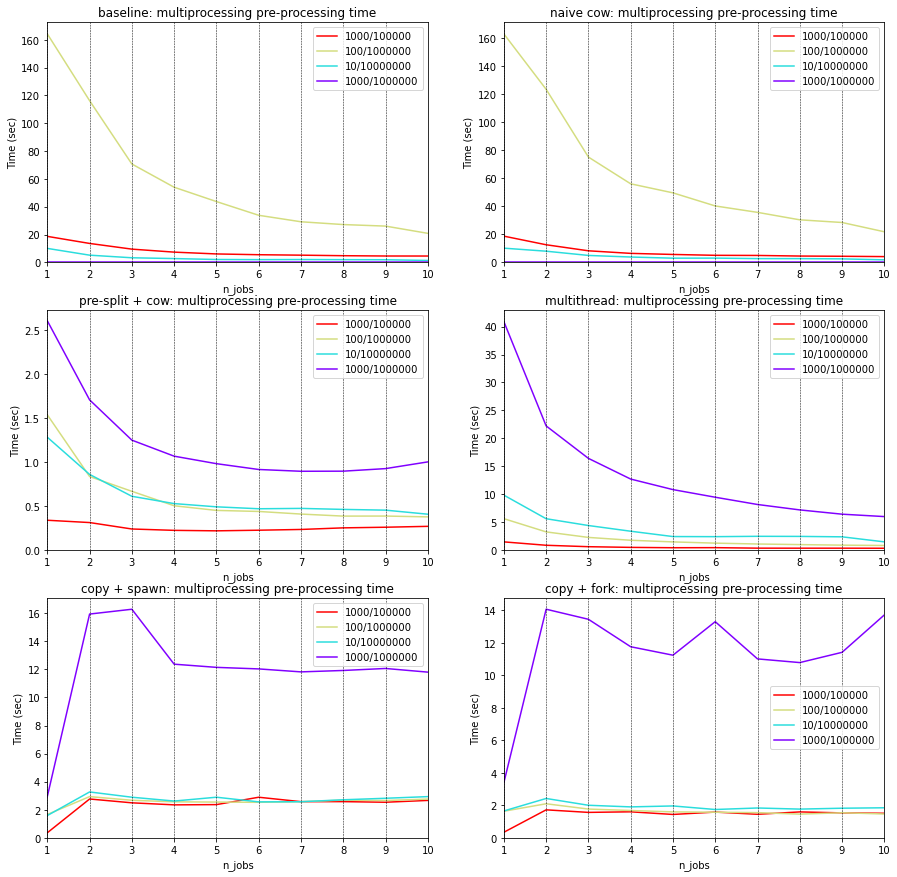

In [17]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
ax_ind = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]
for rn, runtimes in enumerate(all_runtimes):
    for i, runtime in enumerate(runtimes[..., 5]): 
        ax[ax_ind[rn]].plot(np.arange(10)+1, runtime, label='%d/%d' % n_m[i], color=colors[i]) 
    for x in range(10): 
        ax[ax_ind[rn]].axvline(x=x+1, color='k', linestyle='--', linewidth=0.5) 
    ax[ax_ind[rn]].legend() 
    ax[ax_ind[rn]].set_xticks(np.arange(10)+1) 
    ax[ax_ind[rn]].set_xlim([1, 10]) 
    ax[ax_ind[rn]].set_xlabel('n_jobs') 
    ax[ax_ind[rn]].set_ylabel('Time (sec)') 
    ax[ax_ind[rn]].set_ylim(bottom=0) 
    ax[ax_ind[rn]].set_title(f'{run_names[rn]}: multiprocessing pre-processing time') 
    #ax[ax_ind[rn]].set_tick_params(colors='w')
fig.show()
#fig.savefig("preprocessing.png")

In [46]:
runtimes.shape

(5, 10, 9)

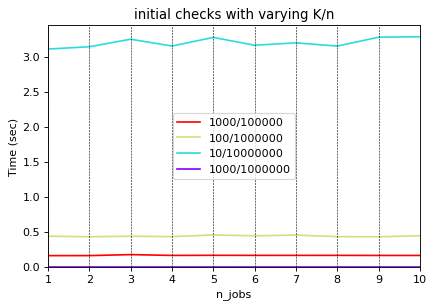

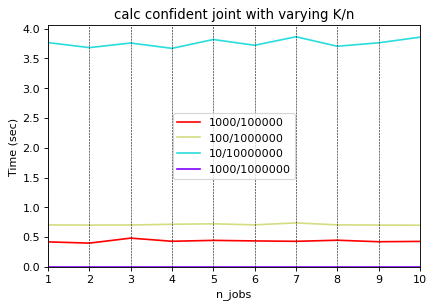

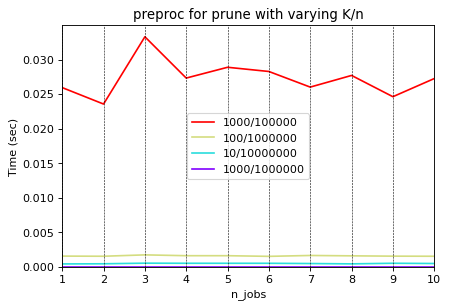

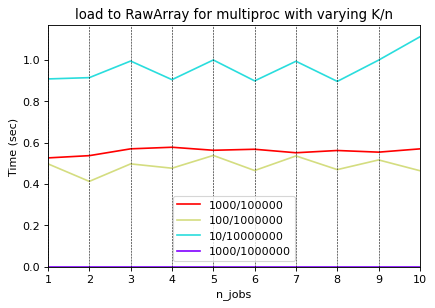

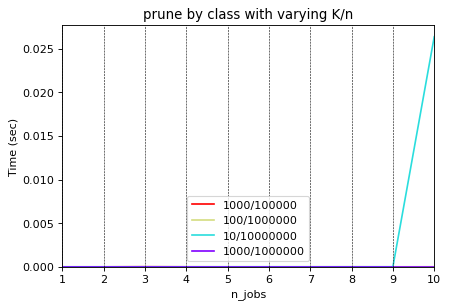

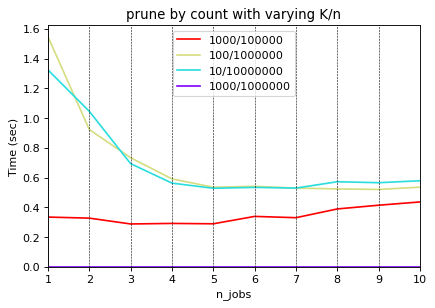

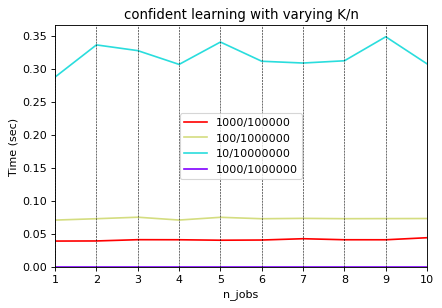

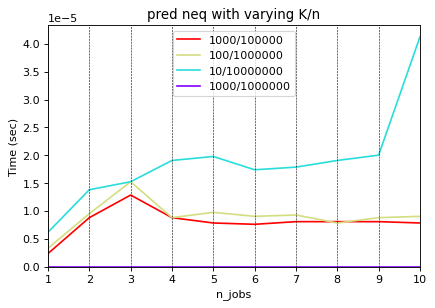

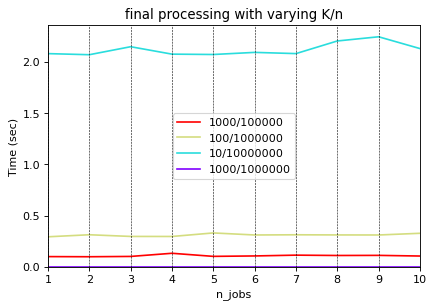

In [11]:
# show all of time points of original run
for check_pt in range(nt):

    plt.figure(figsize=(6, 4), dpi=80) 
    for i, runtime in enumerate(runtimes_cow[..., check_pt]): 
        plt.plot(np.arange(10)+1, runtime, label='%d/%d' % n_m[i], color=colors[i]) 
    for x in range(10): 
        plt.axvline(x=x+1, color='k', linestyle='--', linewidth=0.5) 
    plt.legend() 
    plt.xticks(np.arange(10)+1) 
    plt.xlim([1, 10]) 
    plt.xlabel('n_jobs') 
    plt.ylabel('Time (sec)') 
    plt.ylim(bottom=0) 
    plt.title(f'{ckpt_names[check_pt]} with varying K/n') 
    #plt.tick_params(colors='w')
    plt.show() 

### very tall examples

In [42]:
runtimes_cow = np.load("parallel_results/vtall_cow.npy")
runtimes_spawn = np.load("parallel_results/vtall_spawn.npy")
runtimes_thread = np.load("parallel_results/vtall_thread.npy")

In [43]:
parallel_cow = runtimes_cow[:,:,3] + runtimes_cow[:,:,5]
parallel_spawn = runtimes_spawn[:,:,3] + runtimes_spawn[:,:,5]
parallel_thread = runtimes_thread[:,:,3] + runtimes_thread[:,:,5]

In [44]:
all_parallels = [parallel_cow, parallel_thread, parallel_spawn]

In [45]:
n_m = [(10, 100000000), (100, 1000000), (1000, 1000000)]
run_names = ['pre-slice + cow', 'multithread', 'spawn']
colors = [colormap(i) for i in np.linspace(1, 0, len(n_m))] 

<ipython-input-46-be5955a5b0d1>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


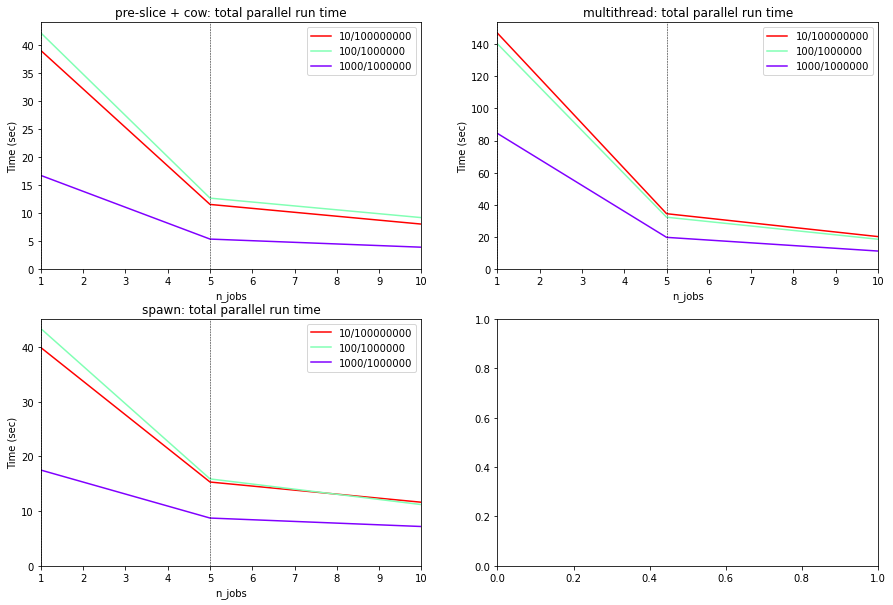

In [46]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax_ind = [(0,0), (0,1), (1,0)]
jobs = np.array([1, 5, 10], dtype=int)
for rn, runtimes in enumerate(all_parallels):
    for i, runtime in enumerate(runtimes): 
        ax[ax_ind[rn]].plot(jobs, runtime[jobs-1], label='%d/%d' % n_m[i], color=colors[i]) 
    for i, x in enumerate(jobs): 
        ax[ax_ind[rn]].axvline(x=x, color='k', linestyle='--', linewidth=0.5) 
    ax[ax_ind[rn]].legend() 
    ax[ax_ind[rn]].set_xticks(np.arange(10)+1) 
    ax[ax_ind[rn]].set_xlim([1, 10]) 
    ax[ax_ind[rn]].set_xlabel('n_jobs') 
    ax[ax_ind[rn]].set_ylabel('Time (sec)') 
    ax[ax_ind[rn]].set_ylim(bottom=0) 
    ax[ax_ind[rn]].set_title(f'{run_names[rn]}: total parallel run time') 
    #ax[ax_ind[rn]].set_tick_params(colors='w')
fig.show()
#fig.savefig("preprocessing.png")

# testing before PR

In [5]:
from time import time

In [18]:
# basic test
n = 100
m = 5
pred_probs = np.random.randint(low=1, high=100, size=[n, m], dtype=np.uint8) 
pred_probs = normalize(pred_probs) 
labels = np.repeat(np.arange(m), n // m) 
start = time()
issues = find_label_issues(pred_probs=pred_probs, labels=labels, n_jobs=1)
print(f"old: took {time()-start} s\n")
start = time()
issues_test = find_label_issues_test(pred_probs=pred_probs, labels=labels, n_jobs=1)
print(f"new: took {time()-start} s")
print(f"diff from old: {np.sum(issues ^ issues_test)}")

old: took 0.004830837249755859 s

new: took 0.005732059478759766 s
diff from old: 0


In [19]:
# basic, n_jobs=2
n = 100
m = 5
pred_probs = np.random.randint(low=1, high=100, size=[n, m], dtype=np.uint8) 
pred_probs = normalize(pred_probs) 
labels = np.repeat(np.arange(m), n // m) 
start = time()
issues = find_label_issues(pred_probs=pred_probs, labels=labels, n_jobs=2)
print(f"old: took {time()-start} s\n")
start = time()
issues_test = find_label_issues_test(pred_probs=pred_probs, labels=labels, n_jobs=2)
print(f"new: took {time()-start} s")
print(f"diff from old: {np.sum(issues ^ issues_test)}")

old: took 4.166215896606445 s

new: took 2.2883808612823486 s
diff from old: 0


In [20]:
# large matrix
n = 2000000
m = 100
#pred_probs = np.random.randint(low=1, high=100, size=[n, m], dtype=np.uint8) 
#pred_probs = normalize(pred_probs) 
#labels = np.repeat(np.arange(m), n // m) 
start = time()
#issues_new_single = find_label_issues_test(pred_probs=pred_probs, labels=labels, n_jobs=1)
print(f"new single: took {time()-start} s\n")
start = time()
#issues_new_multi = find_label_issues_test(pred_probs=pred_probs, labels=labels, n_jobs=4)
print(f"new multi: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_new_multi)}\n")
np.sum(issues_single ^ issues_multi)
start = time()
#issues_old_single = find_label_issues(pred_probs=pred_probs, labels=labels, n_jobs=1)
print(f"old single: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_old_single)}")
print(f"diff from new multi {np.sum(issues_new_multi ^ issues_old_single)}\n")
start = time()
#issues_old_multi = find_label_issues(pred_probs=pred_probs, labels=labels, n_jobs=4)
print(f"old multi: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_old_multi)}")
print(f"diff from new multi {np.sum(issues_new_multi ^ issues_old_multi)}")
print(f"diff from old single {np.sum(issues_old_single ^ issues_old_multi)}")

new single: took 5.6743621826171875e-05 s

new multi: took 7.081031799316406e-05 s
diff from new single 0

old single: took 0.00011706352233886719 s
diff from new single 0
diff from new multi 0

old multi: took 9.799003601074219e-05 s
diff from new single 0
diff from new multi 0
diff from old single 0


In [21]:
# few classes
n = 2000
m = 2
pred_probs = np.random.randint(low=1, high=100, size=[n, m], dtype=np.uint8) 
pred_probs = normalize(pred_probs) 
labels = np.repeat(np.arange(m), n // m) 
start = time()
issues_new_single = find_label_issues_test(pred_probs=pred_probs, labels=labels, n_jobs=1)
print(f"new single: took {time()-start} s\n")
start = time()
issues_new_multi = find_label_issues_test(pred_probs=pred_probs, labels=labels, n_jobs=4)
print(f"new multi: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_new_multi)}\n")
np.sum(issues_single ^ issues_multi)
start = time()
issues_old_single = find_label_issues(pred_probs=pred_probs, labels=labels, n_jobs=1)
print(f"old single: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_old_single)}")
print(f"diff from new multi {np.sum(issues_new_multi ^ issues_old_single)}\n")
start = time()
issues_old_multi = find_label_issues(pred_probs=pred_probs, labels=labels, n_jobs=4)
print(f"old multi: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_old_multi)}")
print(f"diff from new multi {np.sum(issues_new_multi ^ issues_old_multi)}")
print(f"diff from old single {np.sum(issues_old_single ^ issues_old_multi)}\n")

new single: took 0.01016998291015625 s

new multi: took 3.7956578731536865 s
diff from new single 0

old single: took 0.009122848510742188 s
diff from new single 0
diff from new multi 0

old multi: took 4.095242977142334 s
diff from new single 0
diff from new multi 0
diff from old single 0



In [26]:
# many classes
n = 20000
m = 1000
pred_probs = np.random.randint(low=1, high=100, size=[n, m], dtype=np.uint8) 
pred_probs = normalize(pred_probs) 
labels = np.repeat(np.arange(m), n // m) 
start = time()
issues_new_single = find_label_issues_test(pred_probs=pred_probs, labels=labels, n_jobs=1)
print(f"new single: took {time()-start} s\n")
start = time()
issues_new_multi = find_label_issues_test(pred_probs=pred_probs, labels=labels, n_jobs=4)
print(f"new multi: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_new_multi)}\n")
np.sum(issues_single ^ issues_multi)
start = time()
issues_old_single = find_label_issues(pred_probs=pred_probs, labels=labels, n_jobs=1)
print(f"old single: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_old_single)}")
print(f"diff from new multi {np.sum(issues_new_multi ^ issues_old_single)}\n")
start = time()
issues_old_multi = find_label_issues(pred_probs=pred_probs, labels=labels, n_jobs=4)
print(f"old multi: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_old_multi)}")
print(f"diff from new multi {np.sum(issues_new_multi ^ issues_old_multi)}")
print(f"diff from old single {np.sum(issues_old_single ^ issues_old_multi)}\n")

new single: took 1.759403944015503 s

new multi: took 4.372657299041748 s
diff from new single 0

old single: took 37.891650676727295 s
diff from new single 0
diff from new multi 0

old multi: took 16.574445009231567 s
diff from new single 1
diff from new multi 1
diff from old single 1



In [22]:
# basic, prune_by_class
n = 2000
m = 2
pred_probs = np.random.randint(low=1, high=100, size=[n, m], dtype=np.uint8) 
pred_probs = normalize(pred_probs) 
labels = np.repeat(np.arange(m), n // m) 
start = time()
issues_new_single = find_label_issues_test(pred_probs=pred_probs, labels=labels, n_jobs=1, filter_by="prune_by_class")
print(f"new single: took {time()-start} s\n")
start = time()
issues_new_multi = find_label_issues_test(pred_probs=pred_probs, labels=labels, n_jobs=4, filter_by="prune_by_class")
print(f"new multi: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_new_multi)}\n")
np.sum(issues_single ^ issues_multi)
start = time()
issues_old_single = find_label_issues(pred_probs=pred_probs, labels=labels, n_jobs=1, filter_by="prune_by_class")
print(f"old single: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_old_single)}")
print(f"diff from new multi {np.sum(issues_new_multi ^ issues_old_single)}\n")
start = time()
issues_old_multi = find_label_issues(pred_probs=pred_probs, labels=labels, n_jobs=4, filter_by="prune_by_class")
print(f"old multi: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_old_multi)}")
print(f"diff from new multi {np.sum(issues_new_multi ^ issues_old_multi)}")
print(f"diff from old single {np.sum(issues_old_single ^ issues_old_multi)}\n")

new single: took 0.010574817657470703 s

new multi: took 3.822834014892578 s
diff from new single 0

old single: took 0.011878252029418945 s
diff from new single 0
diff from new multi 0

old multi: took 3.919471025466919 s
diff from new single 0
diff from new multi 0
diff from old single 0



In [24]:
# large, prune_by_class
n = 2000000
m = 100
pred_probs = np.random.randint(low=1, high=100, size=[n, m], dtype=np.uint8) 
pred_probs = normalize(pred_probs) 
labels = np.repeat(np.arange(m), n // m) 
start = time()
issues_new_single = find_label_issues_test(pred_probs=pred_probs, labels=labels, n_jobs=1, filter_by="prune_by_class")
print(f"new single: took {time()-start} s\n")
start = time()
issues_new_multi = find_label_issues_test(pred_probs=pred_probs, labels=labels, n_jobs=4, filter_by="prune_by_class")
print(f"new multi: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_new_multi)}\n")
np.sum(issues_single ^ issues_multi)
start = time()
issues_old_single = find_label_issues(pred_probs=pred_probs, labels=labels, n_jobs=1, filter_by="prune_by_class")
print(f"old single: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_old_single)}")
print(f"diff from new multi {np.sum(issues_new_multi ^ issues_old_single)}\n")
start = time()
issues_old_multi = find_label_issues(pred_probs=pred_probs, labels=labels, n_jobs=4, filter_by="prune_by_class")
print(f"old multi: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_old_multi)}")
print(f"diff from new multi {np.sum(issues_new_multi ^ issues_old_multi)}")
print(f"diff from old single {np.sum(issues_old_single ^ issues_old_multi)}\n")

new single: took 7.338840961456299 s



100%|██████████| 100/100 [00:04<00:00, 20.56it/s]


new multi: took 12.95492696762085 s
diff from new single 0

old single: took 10.276208877563477 s
diff from new single 0
diff from new multi 0



100%|██████████| 100/100 [00:07<00:00, 12.61it/s]


old multi: took 123.34583592414856 s
diff from new single 0
diff from new multi 0
diff from old single 0



In [54]:
# basic, multi-label
n = 100
m = 5
pred_probs = np.random.randint(low=1, high=100, size=[n, m], dtype=np.uint8) 
pred_probs = normalize(pred_probs) 
labels = []
for i in range(n):
    num_labels = np.random.randint(4)
    if num_labels > 0:
        labels.append(list(np.random.randint(m, size=num_labels)))
    else:
        labels.append([])
start = time()
issues_new_single = find_label_issues_test(pred_probs=pred_probs, labels=labels, n_jobs=1, multi_label=True)
print(f"new single: took {time()-start} s\n")
start = time()
issues_new_multi = find_label_issues_test(pred_probs=pred_probs, labels=labels, n_jobs=4, multi_label=True)
print(f"new multi: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_new_multi)}\n")
np.sum(issues_single ^ issues_multi)
start = time()
issues_old_single = find_label_issues(pred_probs=pred_probs, labels=labels, n_jobs=1, multi_label=True)
print(f"old single: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_old_single)}")
print(f"diff from new multi {np.sum(issues_new_multi ^ issues_old_single)}\n")
start = time()
issues_old_multi = find_label_issues(pred_probs=pred_probs, labels=labels, n_jobs=4, multi_label=True)
print(f"old multi: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_old_multi)}")
print(f"diff from new multi {np.sum(issues_new_multi ^ issues_old_multi)}")
print(f"diff from old single {np.sum(issues_old_single ^ issues_old_multi)}\n")

new single: took 0.0193479061126709 s

new multi: took 12.42016887664795 s
diff from new single 0

old single: took 0.0167391300201416 s
diff from new single 0
diff from new multi 0

old multi: took 17.405098915100098 s
diff from new single 0
diff from new multi 0
diff from old single 0



In [45]:
# multi-label, 
n = 100
m = 5
pred_probs = np.random.randint(low=1, high=100, size=[n, m], dtype=np.uint8) 
pred_probs = normalize(pred_probs) 
labels = []
for i in range(n):
    num_labels = np.random.randint(4)
    if num_labels > 0:
        labels.append(list(np.random.randint(m, size=num_labels)))
    else:
        labels.append([])
start = time()
issues_new_single = find_label_issues_test(pred_probs=pred_probs, labels=labels, n_jobs=1, multi_label=True)
print(f"new single: took {time()-start} s\n")
start = time()
issues_new_multi = find_label_issues_test(pred_probs=pred_probs, labels=labels, n_jobs=4, multi_label=True)
print(f"new multi: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_new_multi)}\n")
np.sum(issues_single ^ issues_multi)
start = time()
issues_old_single = find_label_issues(pred_probs=pred_probs, labels=labels, n_jobs=1, multi_label=True)
print(f"old single: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_old_single)}")
print(f"diff from new multi {np.sum(issues_new_multi ^ issues_old_single)}\n")
start = time()
issues_old_multi = find_label_issues(pred_probs=pred_probs, labels=labels, n_jobs=4, multi_label=True)
print(f"old multi: took {time()-start} s")
print(f"diff from new single {np.sum(issues_new_single ^ issues_old_multi)}")
print(f"diff from new multi {np.sum(issues_new_multi ^ issues_old_multi)}")
print(f"diff from old single {np.sum(issues_old_single ^ issues_old_multi)}\n")

In [46]:
labels.append(list(np.random.randint(4, size=4)))

In [47]:
labels.append(5)

In [48]:
labels

[[3, 0, 1, 2], 5]